<a href="https://colab.research.google.com/github/ihagoSantos/statistical_models/blob/main/logistic_regression_with_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Binária  no R

## Carregando a base de dados
O banco de dados do pacote aplore3 é chamado lowbwt. No conjunto temos 11 variáveis com informações referentes a 189 partos.
As variáveis são:
- ID: Código de identificação
- Low: Baixo peso ao nascer
- Age: idade da mãe (anos)
- Lwt: Peso da mãe na última menstruação (Libras)
- Race: Raça (1: Branca, 2: Preta, 3: Outra)
- Smoke: Tabagismo durante a gravidez (1: não, 2: sim)
- Plt: Histórico de trabalho de parto prematuro (1: Nenhum, 2: Um, 3: Dois, etc)
- Ht: Histórico de hipertensão (1: Não, 2: sim)
- Ui: Presença de irritabilidade uterina (1: não, 2: sim)
- ftv: Número de consultas médicas durante o primeiro trimestre(1: nenhuma, 2: uma, 3: duas, etc)
- bwt: Peso ao nascer registrado (gramas)


In [2]:
install.packages('aplore3')
install.packages('ResourceSelection')
library(aplore3)
library(ResourceSelection)
library(stats)
data(lowbwt)
lowbwt

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’


ResourceSelection 0.3-6 	 2023-06-27



id,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
4,< 2500 g,28,120,Other,Yes,One,No,Yes,None,709
10,< 2500 g,29,130,White,No,None,No,Yes,"Two, etc.",1021
11,< 2500 g,34,187,Black,Yes,None,Yes,No,None,1135
13,< 2500 g,25,105,Other,No,One,Yes,No,None,1330
15,< 2500 g,25,85,Other,No,None,No,Yes,None,1474
16,< 2500 g,27,150,Other,No,None,No,No,None,1588
17,< 2500 g,23,97,Other,No,None,No,Yes,One,1588
18,< 2500 g,24,128,Black,No,One,No,No,One,1701
19,< 2500 g,24,132,Other,No,None,Yes,No,None,1729


# Análise Descritiva
PAra a regressão logística iremos utilizar as 4 variáveis:
- low
- age
- lwt
- smoke
Sendo low a variável resposta, age e lwt covariáveis preditoras numéricas e smoke uma covariável preditora categórica (fator)
Para realizar a análise descritiva iremos iniciar realizando boxplots das idads das mães pelo peso do bebê.

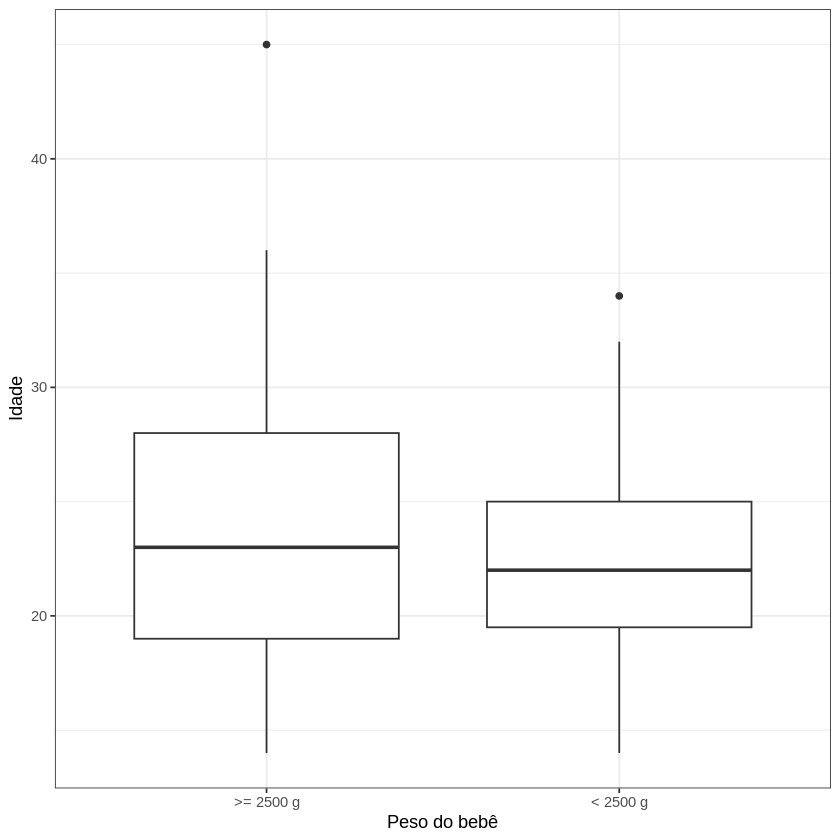

In [3]:
library(ggplot2)
theme_set(theme_bw())

ggplot(data=lowbwt, aes(x = low, y = age)) + geom_boxplot() + labs(x = "Peso do bebê", y = "Idade")

É possível perceber que não há uma diferença significativa entre os dois grupos. Ou seja, provavelmente a idade da mãe não deve ter significâcia no modelo.

Em um segundo boxplot, temos o peso da mãe e o peso do bebê ao nascer.

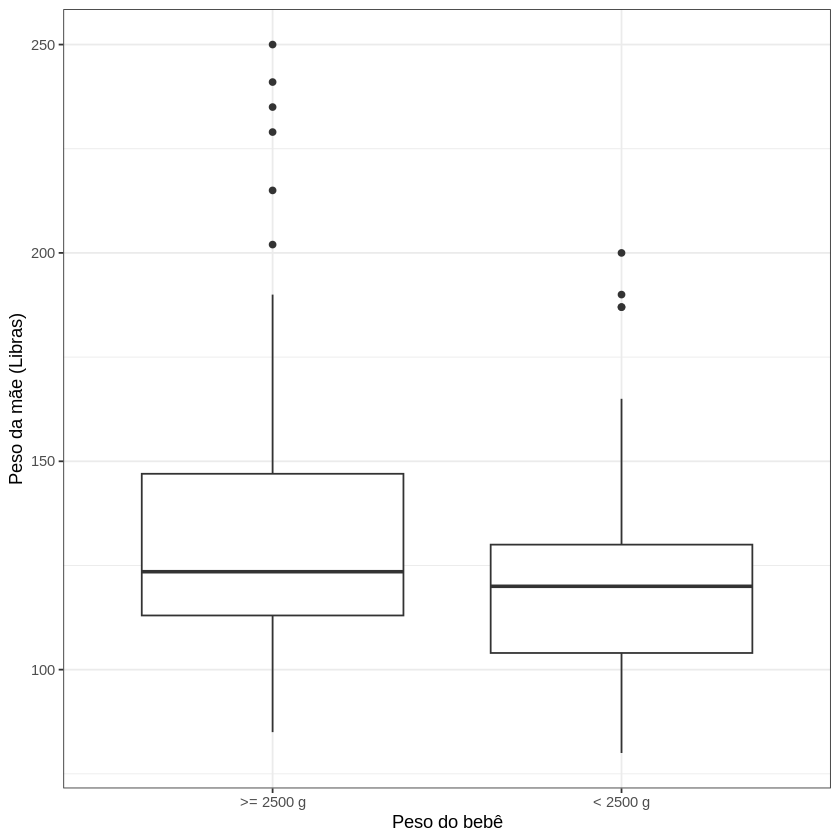

In [5]:
ggplot(data=lowbwt, aes(x = low, y = lwt)) +
  geom_boxplot() +
  labs(x = "Peso do bebê", y = "Peso da mãe (Libras)")

Agora iremos analisar se a mãe fumou pelo peso do bebê.

In [6]:
table(lowbwt$smoke, lowbwt$low) # tabela de contingência

     
      >= 2500 g < 2500 g
  No         86       29
  Yes        44       30

## Transformando todaqs as variáveis em Dummies
Obs: É importante verificar se as variáveis fatores estão realmente como fatores.

In [7]:
class(lowbwt$low)

[1] "factor"

In [8]:
class(lowbwt$smoke)

[1] "factor"

In [11]:
levels(lowbwt$low) = c(0, 1)
levels(lowbwt$smoke) = c(0, 1)

# Modelagem
Queremos estimar a probabilidade de um bebê ter peso menor que 2500g ao nascer, a partir da idade da mãe, do peso dela no último período menstrual e se ela fumou durante a gravidez.

O GLM usando o argumento family = binomial, por default, usa a função de ligação logito.

In [12]:
ajuste1 <- glm(low ~ age, family = binomial, data = lowbwt)

## Resumo das estatísticas do modelo

In [13]:
summary(ajuste1)


Call:
glm(formula = low ~ age, family = binomial, data = lowbwt)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.38458    0.73212   0.525    0.599
age         -0.05115    0.03151  -1.623    0.105

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 231.91  on 187  degrees of freedom
AIC: 235.91

Number of Fisher Scoring iterations: 4


Considerando um nível de 5% de significância, a idade da mãe não influencia no modelo, já que seu p-valor é igual a 0.105 para testar a hipótesede que o respectivo parâmetro é igual a zero, usando a estatística de Wald.

Vamos repetir o processo com o peso da mãe.

In [14]:
ajuste2 <- glm(low ~ lwt, family = binomial, data = lowbwt)
summary(ajuste2)


Call:
glm(formula = low ~ lwt, family = binomial, data = lowbwt)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.99831    0.78529   1.271   0.2036  
lwt         -0.01406    0.00617  -2.279   0.0227 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 228.69  on 187  degrees of freedom
AIC: 232.69

Number of Fisher Scoring iterations: 4


Considerando 5% de significância, a estatística de Wald mostra que o peso da mãe é significativo para o modelo (p=0.0227).

O Terceito ajuste usa a variável indicadora de fumo da mãe durante o parto.

In [16]:
ajuste3 <- glm(low ~ smoke, family = binomial, data = lowbwt)
summary(ajuste3)


Call:
glm(formula = low ~ smoke, family = binomial, data = lowbwt)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0871     0.2147  -5.062 4.14e-07 ***
smoke1        0.7041     0.3196   2.203   0.0276 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 229.80  on 187  degrees of freedom
AIC: 233.8

Number of Fisher Scoring iterations: 4


As mães fumantes apresentam uma probabilidade de ter um filho mais leve maior que as não fumantes (p=0.0276).

realizar um ajuste com as duas variávels que foram significativas.

In [17]:
ajuste4 <- glm(low ~ lwt + smoke, family=binomial, data=lowbwt)
summary(ajuste4)


Call:
glm(formula = low ~ lwt + smoke, family = binomial, data = lowbwt)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  0.62200    0.79592   0.781   0.4345  
lwt         -0.01332    0.00609  -2.188   0.0287 *
smoke1       0.67667    0.32470   2.084   0.0372 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 234.67  on 188  degrees of freedom
Residual deviance: 224.34  on 186  degrees of freedom
AIC: 230.34

Number of Fisher Scoring iterations: 4


Vamos utilizar a tabela ANOVA com testes da máxima verossimilhança para verificar a significância do modelo completo

In [18]:
anova(ajuste4, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,188,234.6720,NA
lwt,1,5.981327,187,228.6907,0.01445812
smoke,1,4.350018,186,224.3407,0.03700855


In [19]:
anova(ajuste3, ajuste4, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,187,229.8046,NA,NA,NA
2,186,224.3407,1,5.463949,0.01941273


Considerando ainda um nível de 5% de significância, o modelo com as variáveis lwt e smoke mostrou-se significativo.

# Análise de Resíduos

Análise do resíduo por Pearson \
1°: Gerar o gráfico de resíduos e verificar se tem valores acima de 2.

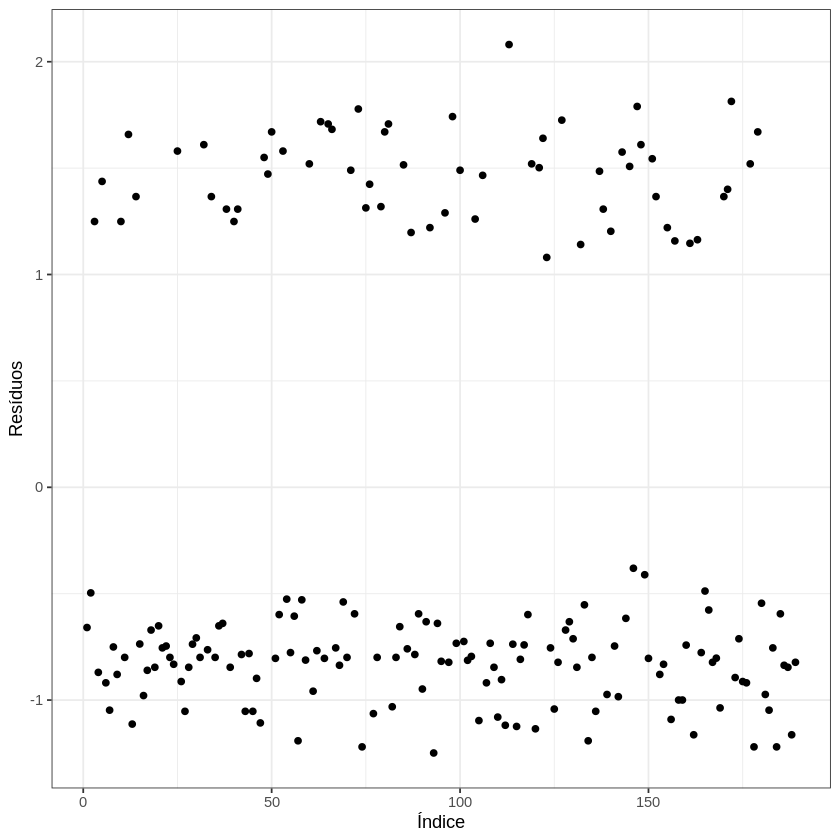

In [21]:
resp <- data.frame(indice = 1:nrow(lowbwt),
                    residuos = residuals(ajuste4, type="deviance")
)

ggplot(resp, aes(x=sample(indice), y = residuos)) +
  geom_point() +
  labs(x = "Índice", y = "Resíduos")

Como não temos valores que passam de 2 ou -2, no geral, os resíduos estão bem comportados.

# Testes de adequação do modelo
## 1. Pearson Chi-Square Test
### Hipótese Testada:
- $H_0$: O modelo ajusta bem os dados.
- $H_a$: O modelo não ajusta bem os dados.

### Condição de aceitação/rejeição:
- Calcula-se a estatística do teste qui-quadrado de PEarson, que segue uma distribuição qui-quadrado com $n - p$ graus de liberdade.
- Aceitação de $H_0$: Se o valor $p$ é maior que $\alpha$ aceitamos $H_0$ e concluímos que o modelo ajusta bem os dados.
- Rejeição de $H_0$: Se o valor $p$ é menor que $\alpha$, rejeitamos $H_0$ e concluímos que o modelo não ajusta bem os dados.

In [23]:
# Pearson Chi-Square Test
pearson_residuals <- residuals(ajuste4, type="pearson")
pearson_chi2 <- sum(pearson_residuals^2)
pearson_p_value <- 1 - pchisq(pearson_chi2, df.residual(ajuste4))
cat("Pearson Chi-Square Test: Chi2 =", pearson_chi2, "p-value =", pearson_p_value, "\n")

Pearson Chi-Square Test: Chi2 = 187.3828 p-value = 0.4577639 
